In [1]:
# imports and loading
import pandas as pd
from pymodulon.io import *
from os import path
import matplotlib.pyplot as plt

interim_dir = path.join('..','data','interim')
ica_data = load_json_model(path.join(interim_dir,'zmo_raw.json.gz'))
proteomics_df = pd.read_excel('../data/external/proteomics_10_3389_fmicb_2019_02596.XLSX', sheet_name = 'LFQ', index_col = 0)


# mid-glucose (T1, about 50% glucose utilized)
# late glucose (T2, about 5–10 g glucose/L remaining)
# early xylose (T3, ∼1 h after glucose was completely depleted)
# late xylose (T4, ∼24 h after glucose was completely depleted)
# let's focus on SynH3- samples, as I'm not particularlly interested in stressors
column_to_sample = {
    'LDI_early_glucose_fold_change' : 'lignocellulose_ferment:high_ACSH_early',
    'LDI_late_glucose_fold_change' : 'lignocellulose_ferment:high_ACSH_mid',
    'LDI_early_xylose_fold_change' : 'lignocellulose_ferment:high_ACSH_late',
    'LDI_late_xylose_fold_change' : 'lignocellulose_ferment:high_ACSH_stat',
    'no_LDI_early_glucose_fold_change' : 'lignocellulose_ferment:low_ACSH_early',
    'no_LDI_late_glucose_fold_change' : 'lignocellulose_ferment:low_ACSH_mid',
    'no_LDI_early_xylose_fold_change' : 'lignocellulose_ferment:low_ACSH_late',
    'no_LDI_late_xylose_fold_change' : 'lignocellulose_ferment:low_ACSH_stat',
}


sample_X_df = pd.DataFrame(index = ica_data.X.index)
for group_id, group_df in ica_data.sample_table.groupby('full_name'):
    sample_X_df[group_id] = ica_data.X[group_df.index].T.mean()
    

/home/chris/miniforge3/envs/modulome/lib/python3.7/site-packages/ipykernel_launcher.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


In [23]:
sample_X_df.loc[sample_X_df[column_to_sample.values()].[''] != 0]

,MMG_RMG_oxidative:MMG_anaer_mid,MMG_RMG_oxidative:MMG_anaer_stat,MMG_RMG_oxidative:RMG_aero_mid,MMG_RMG_oxidative:RMG_aero_stat,MMG_RMG_oxidative:RMG_anaer_mid,MMG_RMG_oxidative:RMG_anaer_stat,Mg_RMG:RMBD,Mg_RMG:RMG,Mg_RMG:RMG_Mg,aerobicity:DZM0422_Aerobic,...,tetR_family_KO:ZM42811547_in_RM,tetR_family_KO:ZM4281963_in_NaAc,tetR_family_KO:ZM4281963_in_RM,tetR_family_KO:ZM49631547_in_NaAc,tetR_family_KO:ZM49631547_in_RM,tetR_family_KO:ZM4_in_RM,xylose:glucose_mid_log,xylose:xylose_stationary,xylose_inhibitor_treat:0_past_inhibitor,xylose_inhibitor_treat:15_past_inhibitor
ZCP4_0005,-0.922924,-0.192189,4.625929e-18,0.557834,-1.213904,-1.305344,0.074959,9.020562e-16,0.333130,0.885873,...,-0.823501,-0.575793,-0.085409,-0.179616,-0.406898,0.000000e+00,1.554312e-15,1.965800,0.000000e+00,0.365397
ZCP4_0006,-0.384094,-0.766642,-6.007926e-16,-0.241101,-0.273248,-0.663927,0.104633,0.000000e+00,0.013037,0.082346,...,0.165093,-0.073967,0.261730,-0.456854,0.101154,0.000000e+00,7.979728e-16,-0.391250,0.000000e+00,-0.351755
ZCP4_0007,-0.536618,0.652879,-2.995289e-16,0.711859,-0.738952,-0.575486,-0.004199,0.000000e+00,0.144982,0.515666,...,0.072326,-0.048907,0.328218,-0.436778,0.017813,0.000000e+00,-5.342948e-16,-0.101602,0.000000e+00,-0.345370
ZCP4_0008,-0.060078,-0.224175,-1.800282e-15,-0.688371,-0.117651,-0.952730,0.151828,0.000000e+00,-0.105715,-0.100562,...,0.469922,0.246332,0.172382,0.429053,0.206758,0.000000e+00,-4.579670e-16,-1.673982,0.000000e+00,-0.530545
ZCP4_0009,0.204050,-0.300178,-5.660258e-16,-0.643058,0.380383,-0.331717,0.290529,-4.510281e-16,0.020091,-0.415585,...,0.179505,0.129551,0.203788,0.087402,0.095425,-8.985868e-16,-1.554312e-15,-1.597540,4.510281e-16,-0.267118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZCP4_1930,-2.245778,-4.532341,-2.683039e-16,-1.870481,-1.200093,-2.303626,-0.164274,0.000000e+00,-0.251104,0.256298,...,0.710805,-0.183454,0.049703,0.432529,0.173956,0.000000e+00,0.000000e+00,1.239720,0.000000e+00,-0.452693
ZCP4_1931,-1.686307,-1.695668,-1.147230e-15,0.325797,-1.377489,-3.029673,0.344744,0.000000e+00,0.584032,0.527082,...,0.894464,0.275151,0.170077,1.016726,1.075071,8.500145e-16,-4.440892e-16,1.454050,0.000000e+00,0.090965
ZCP4_1936,-2.392158,-1.017750,9.344377e-16,2.033705,-1.311843,-0.791993,0.337414,2.498002e-16,0.482163,1.988788,...,0.647908,1.148618,0.890297,1.149544,0.587377,0.000000e+00,0.000000e+00,2.825105,8.500145e-16,0.182180
ZCP4_1937,-2.203766,-1.056002,-2.671474e-16,1.982468,-1.641314,-1.261140,-0.271549,2.012279e-16,0.030981,1.541572,...,0.856668,0.876720,0.796342,0.761888,0.494185,2.498002e-16,1.110223e-16,3.046035,4.510281e-16,-0.120152


In [16]:
to_drop = sample_X_df[column_to_sample.values()]

,lignocellulose_ferment:high_ACSH_early,lignocellulose_ferment:high_ACSH_mid,lignocellulose_ferment:high_ACSH_late,lignocellulose_ferment:high_ACSH_stat,lignocellulose_ferment:low_ACSH_early,lignocellulose_ferment:low_ACSH_mid,lignocellulose_ferment:low_ACSH_late,lignocellulose_ferment:low_ACSH_stat
ZCP4_0005,0.109512,1.948211,2.913248,2.322841,-5.967449e-16,1.031675,2.892775,1.723665
ZCP4_0006,-0.232102,0.484811,-0.070987,0.373648,-5.689893e-16,0.368420,-0.699897,0.217808
ZCP4_0007,-0.230688,0.862610,0.656882,1.440070,3.053113e-16,0.954678,0.299594,1.707684
ZCP4_0008,-0.010194,0.060210,-0.805195,-0.958499,6.291264e-16,0.056015,-1.578198,-1.748287
ZCP4_0009,-0.073071,-0.138397,-0.671370,-1.111652,-5.643634e-16,0.052462,-1.304315,-1.746234
...,...,...,...,...,...,...,...,...
ZCP4_1934,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
ZCP4_1935,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
ZCP4_1936,-0.318631,0.814978,2.759757,3.170984,-3.145632e-16,1.382577,2.639679,2.743876
ZCP4_1937,-0.133290,1.204067,3.147877,3.962909,5.736152e-16,1.407825,3.065962,4.047432


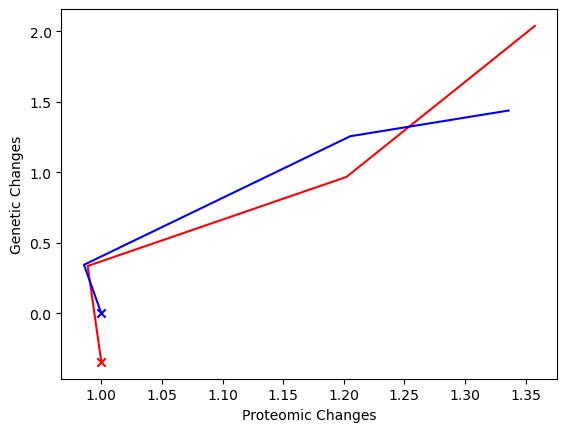

In [25]:
# let's look at expression, iM activity, and proteomics of the genes in question
gene = 'ZCP4_0707' # nitrogen fixation - ZCP4_1350, pentose phosphate pathway - ZCP4_1199, nitrogen uptake - ZCP4_0707
#prot_index = ica_data.gene_table.loc[gene].ZM4_locus.split('_')[1]
gene_changes = sample_X_df[column_to_sample.values()].loc[gene]
prot_changes = ica_data.gene_table.loc[gene][column_to_sample.keys()].rename(index = column_to_sample)
#proteomics_df.loc[prot_index].rename(index = column_to_sample)

order_1 = [
    'lignocellulose_ferment:high_ACSH_early', 
    'lignocellulose_ferment:high_ACSH_mid', 
    'lignocellulose_ferment:high_ACSH_late', 
    'lignocellulose_ferment:high_ACSH_stat',
]
order_2 = [
    'lignocellulose_ferment:low_ACSH_early', 
    'lignocellulose_ferment:low_ACSH_mid', 
    'lignocellulose_ferment:low_ACSH_late', 
    'lignocellulose_ferment:low_ACSH_stat'
]

plt.scatter(prot_changes.loc[order_1][0], gene_changes.loc[order_1][0], c = 'red', marker = 'x')
plt.scatter(prot_changes.loc[order_2][0], gene_changes.loc[order_2][0], c = 'blue', marker = 'x')
plt.plot(prot_changes.loc[order_1], gene_changes.loc[order_1], c = 'red', label = 'high_ACSH')
plt.plot(prot_changes.loc[order_2], gene_changes.loc[order_2], c = 'blue', label = 'low_ACSH')
plt.xlabel('Proteomic Changes')
plt.ylabel('Genetic Changes')
plt.show()

In [33]:
ica_data.gene_table[column_to_sample.keys()].dropna()

,LDI_early_glucose_fold_change,LDI_late_glucose_fold_change,LDI_early_xylose_fold_change,LDI_late_xylose_fold_change,no_LDI_early_glucose_fold_change,no_LDI_late_glucose_fold_change,no_LDI_early_xylose_fold_change,no_LDI_late_xylose_fold_change
ZCP4_0005,1.0,0.754345,1.099577,1.486300,1.0,0.634648,0.953207,1.106023
ZCP4_0006,1.0,1.023540,0.774464,0.347030,1.0,1.048949,0.818626,0.389246
ZCP4_0007,1.0,1.322810,1.412168,1.191922,1.0,1.574152,1.573605,1.522160
ZCP4_0008,1.0,0.973344,0.962517,0.816957,1.0,0.979028,0.879234,0.791123
ZCP4_0009,1.0,1.104998,1.077474,1.033956,1.0,1.023821,0.906263,0.809062
...,...,...,...,...,...,...,...,...
ZCP4_1913,1.0,2.706531,1.548680,1.691702,1.0,1.707175,1.349635,2.187456
ZCP4_1915,1.0,1.597654,1.739251,1.074809,1.0,1.470360,0.751839,0.554294
ZCP4_1919,1.0,1.192823,1.092281,0.986606,1.0,1.238250,1.275363,1.258090
ZCP4_1937,1.0,1.135273,1.521476,1.930336,1.0,1.211845,1.620280,1.733188


array([0.10951176, 1.94821127, 2.91324788, ..., 1.59209521, 3.11800844,
       4.13688067])

In [4]:
ica_data.gene_table.loc['ZCP4_1199']

gene_name                                                                                rpe
accession                                                                         CP006818.1
start                                                                                1348178
end                                                                                  1348840
strand                                                                                     -
gene_product                                                ribulose-5-phosphate 3-epimerase
COG                                                    Carbohydrate transport and metabolism
regulator                                                                                NaN
uniprot                                                                               Q5NRL2
operon                                                                                Op1297
kegg_maps                                  map00030;map00040;map00710;